In [149]:
%pylab inline
import pandas as pd
import os
import glob

Populating the interactive namespace from numpy and matplotlib


In [150]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4

In [151]:
latest_log = sorted(glob.glob('../outputs/*.log'))[-2]
latest_log

'../outputs/train_2018-12-02_21-07-05.log'

In [152]:
def parse_log(infile):
    datas = []
    data = {}
    for line in open(infile).readlines():
        if line.startswith('metric'):
            _, name, val = line.strip('\n').split(' ', 2)
            val = float(val)
            if name=='episodeSteps':
                steps=val
                if len(data): datas.append(data)
                data = {}
            data[name] = val

    df = pd.DataFrame(datas)
    df = df.set_index('steps')
    return df

In [153]:
df = parse_log(latest_log)

In [154]:
df['reward'].plot(style='.', title='reward')

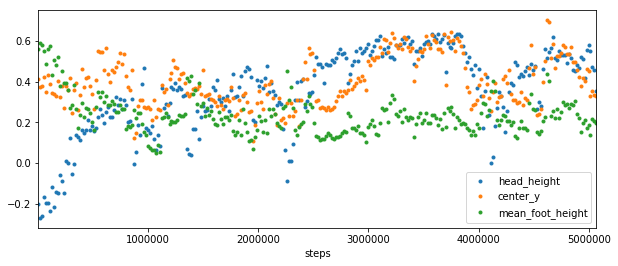

In [155]:
df[['head_height','center_y','mean_foot_height']].plot(style='.')

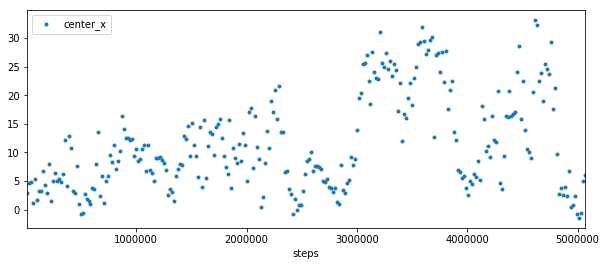

In [156]:
df[['center_x']].plot(style='.')

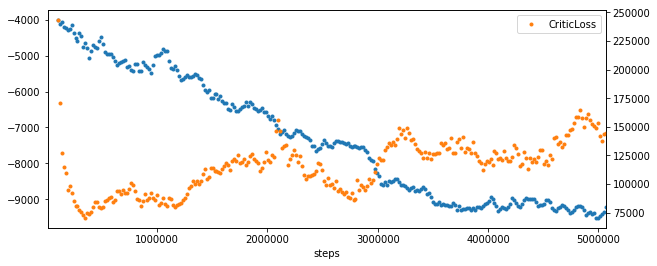

In [157]:
df['ActorLoss'].plot(style='.')
df['CriticLoss'].plot(style='.', secondary_y=True, ax=plt.gca())
plt.legend()

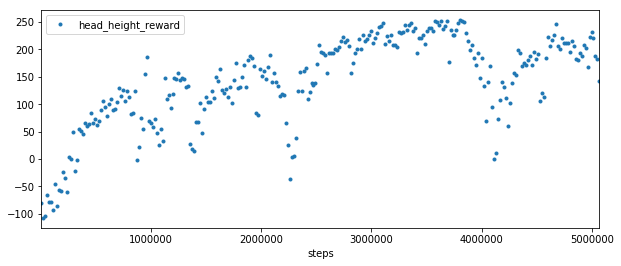

In [158]:
df[['head_height_reward']].plot(style='.')

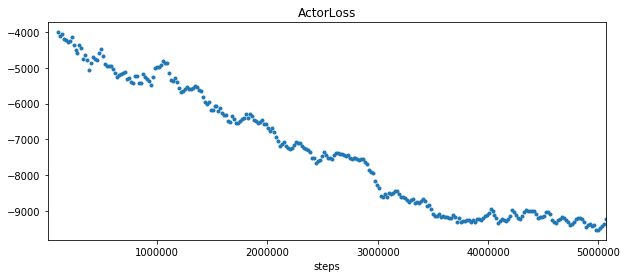

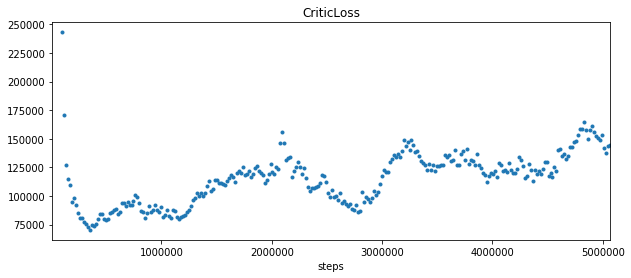

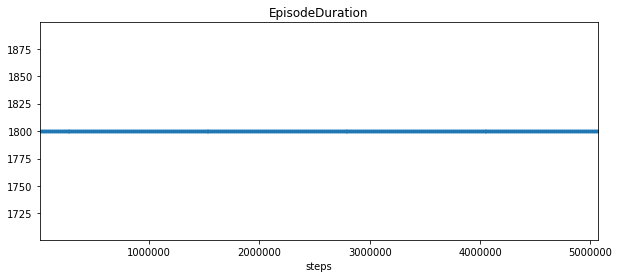

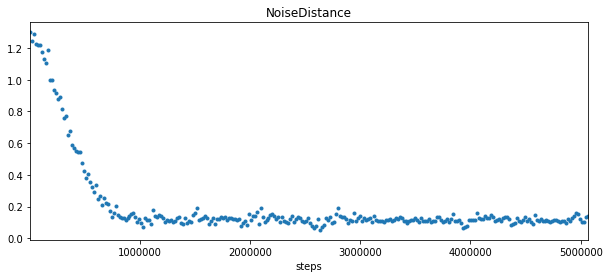

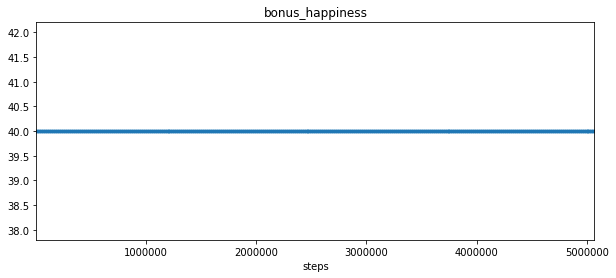

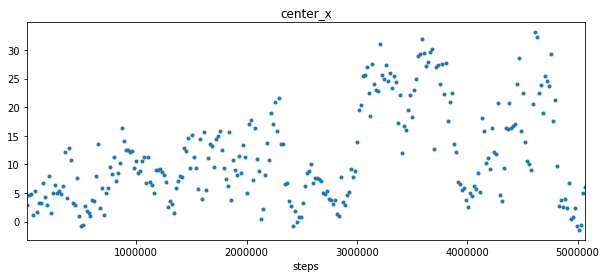

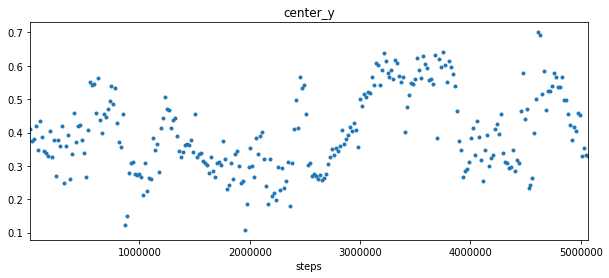

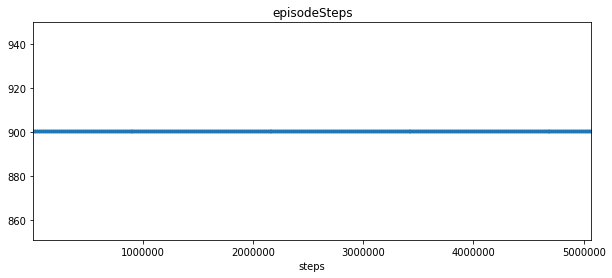

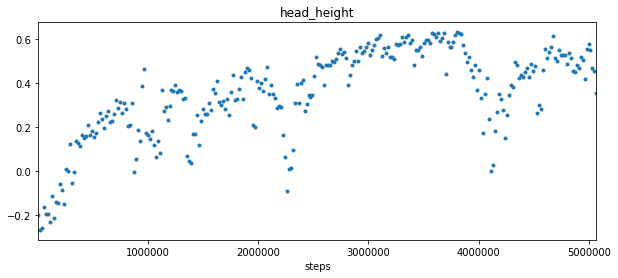

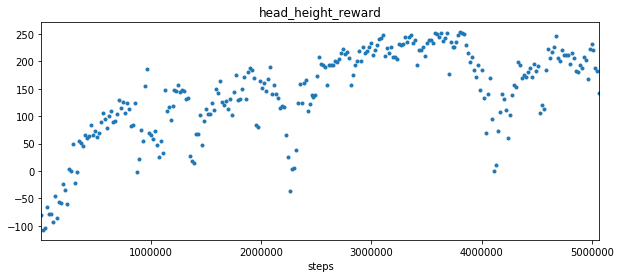

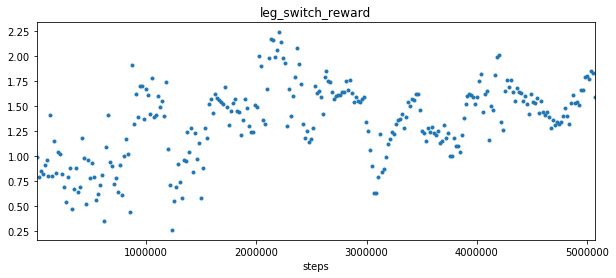

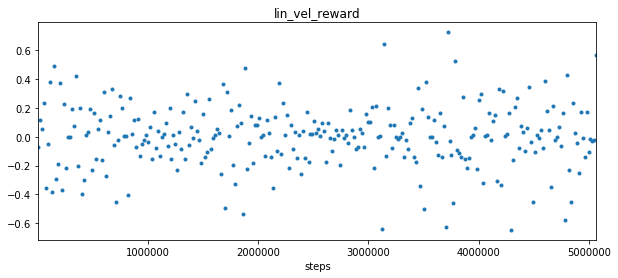

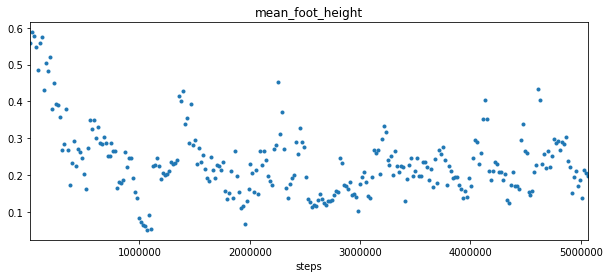

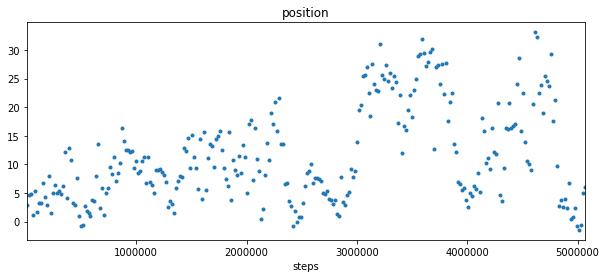

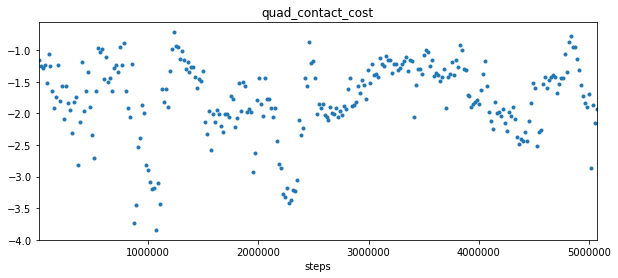

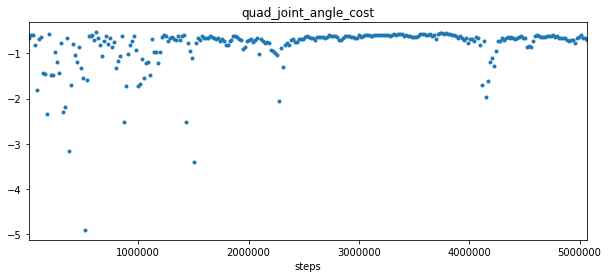

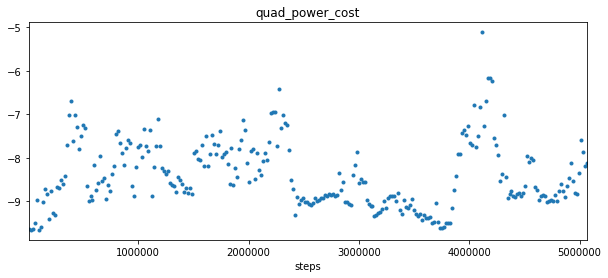

In [159]:
for col in df.columns:
    df[col].plot(style='.', title=col)
    plt.show()